Now, we would like to reorganize our VAE model in a FAIR way. We have already seen how to preserve ML models in previous examples. We will replicate this exercise in a similar fashion. The necessary scripts have been placed inside the `models/model_03_CDMS-NNVAE/src` directory. The script called `trainNsave.py` can be run to train the model and save it. To understant how this particular model is being saved, you can inspect the `CDMS_VAE` class in `model.py`. This class now has a new method called `Save` which uses the `torch.save` functionality to save our VAE model at a certain checkpoint. The saved object is essentially a dictionary which stores information about on which epoch the model is being saved, what was the latest value of the evaluated loss, and the *internal state* of the optimizer as well as the Encoder and Decoder networks. The NN's internal state is essentially recording its parameters. First, let's run our code and let it save the trained model.

trainNsave.py:11: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DL = CDMS_DataLoader(loc='../data/CDMS_Dataset.csv', sep=',')


Saving Model on epoch 0
Epoch 0/1000, 
                        Training MSE Loss = 19.6652 
                        Training KL Div   = 0.0508
                        Test MSE Loss     = 18.9803
                        Test KL div       = 0.0508
                        
Saving Model on epoch 1
Saving Model on epoch 2
Saving Model on epoch 4
Saving Model on epoch 9
Saving Model on epoch 11
Saving Model on epoch 12
Saving Model on epoch 13
Saving Model on epoch 14
Saving Model on epoch 15
Saving Model on epoch 16
Saving Model on epoch 17
Saving Model on epoch 18
Saving Model on epoch 19
Saving Model on epoch 20
Saving Model on epoch 21
Saving Model on epoch 22
Saving Model on epoch 23
Saving Model on epoch 24
Saving Model on epoch 25
Saving Model on epoch 26
Saving Model on epoch 27
Saving Model on epoch 28
Saving Model on epoch 29
Saving Model on epoch 30
Saving Model on epoch 31
Saving Model on epoch 32
Saving Model on epoch 33
Saving Model on epoch 34
Saving Model on epoch 35
Saving M

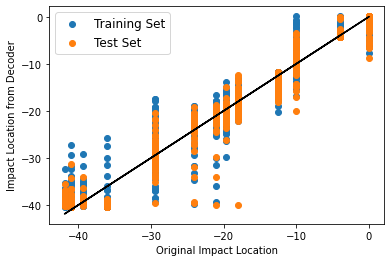

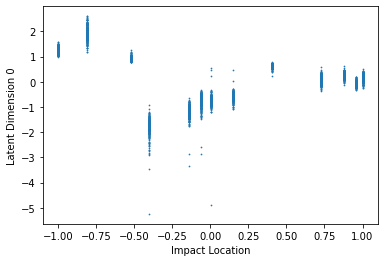

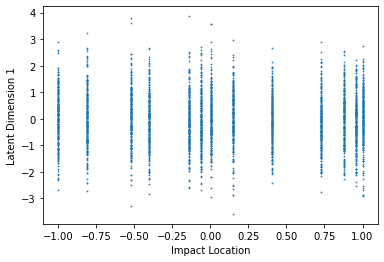

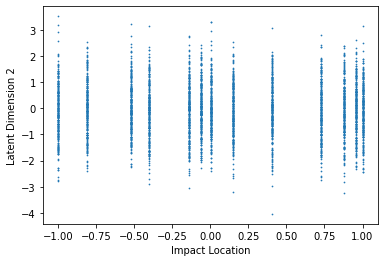

In [1]:
import os
cwd = os.getcwd()
os.chdir('models/model_03_CDMS-NNVAE/src')
%run -i 'trainNsave.py'
os.chdir(cwd)

As you can see, the script produces all the plots that we have seen earlier. Additionally, it saves the model after each epoch as long as the value of the total loss is lowered during that iteraction. Now let's explore the contents of the saved model.

In [3]:
import torch
checkpoint = torch.load("models/model_03_CDMS-NNVAE/trained-model.pt")
checkpoint_keys = list(checkpoint.keys())
print("Checkpoint keys:", checkpoint_keys)
for key in checkpoint_keys:
    print("key = ", key, "; object type = ", type(checkpoint[key]))

Checkpoint keys: ['epoch', 'encoder_state_dict', 'decoder_state_dict', 'optimizer_state_dict', 'loss']
key =  epoch ; object type =  <class 'int'>
key =  encoder_state_dict ; object type =  <class 'collections.OrderedDict'>
key =  decoder_state_dict ; object type =  <class 'collections.OrderedDict'>
key =  optimizer_state_dict ; object type =  <class 'dict'>
key =  loss ; object type =  <class 'float'>


As we can clearly see, the `epoch` and `loss` keys are essentially an integer and a float respectively. The `encoder_state_dict` and `decoder_state_dict` are essentially dictionaries. We can inspect now what it holds.

In [4]:
print(list(checkpoint['encoder_state_dict'].keys()))

['nn.Linear0.weight', 'nn.Linear0.bias', 'nn.Linear1.weight', 'nn.Linear1.bias', 'nn.Linear2.weight', 'nn.Linear2.bias']


Just like before, this is storing the weights and biases of the different layers. We can check the dimensions of the final layer

In [6]:
print(checkpoint['encoder_state_dict']['nn.Linear2.weight'].shape)
print(checkpoint['encoder_state_dict']['nn.Linear2.bias'].shape)

torch.Size([6, 32])
torch.Size([6])


As you can see, the output layer of the Encoder has a dimension of 6, which is exactly twice the size of the latent space.

**Now it's time for some Exercises!!**

- Inspect the model's metadata, stored at the location `models/model_03_CDMS-NNVAE/model-metadata.json`
- Upon inspection, find out what the keywords are, what information they hold, and how they relate with the saved model 
- Now use the model metadata to load the model and run inference on the test dataset. Essentially, you want to create the same plots that the `trainNsave.py` script has created earlier.
- Convert your code into a script called `inference.py`. You should be able to run the script from command line.
- At this point, we want to modify our script to generalize it. Make necessary changes in the `DataUtils.py` script to allow the following:
 - The script will split the dataset in training, validation, and testing datasets
 - The ratio of this split can be passed to the dataloader class
- Change the `model.py` and `trainNsave.py` scripts to allow the validation dataset to be used
- Modify the `Train` method of the `CDMS_NNVAE` class. It should determine whether to save the model based on the loss of the validation dataset
- You can also change the `Train` method to pass to it a $\beta$ hyperparameter to allow an implementation of $\beta$-VAE. Essentially, the $\beta$ parameter will act as a multiplicative weight for the KL divergence loss. You will also need to make additional changes in the script to allow how models are saved and what additional metadata should be included in the model metadata to account for the $\beta$ parameter